In [2]:
# Importação de bibliotecas
import pandas as pd
import numpy as np

## 1. Carregamento das bases de dados

In [63]:
order_payments = pd.read_csv('../base de dados/olist_order_payments_dataset.csv')
products = pd.read_csv('../base de dados/olist_products_dataset.csv')

## 2. Análise exploratória inicial

### 2.1 Base de dados de pagamentos

In [4]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [59]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

A base de dados é constituída por 5 características e 103.886 registros e não há dados faltantes em qualquer característica.

In [7]:
order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [10]:
order_payments['order_id'].unique().size

99440

A quantidade total de compras com identificadores únicos (99.440) é menor que a quantidade de registros na base de cálculo (103.886), o que demonstra que uma compra pode ter vários pagamentos.

In [64]:
order_payments['order_id'].value_counts().head(15)

fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
ee9ca989fc93ba09a6eddc250ce01742    19
4bfcba9e084f46c8e3cb49b0fa6e6159    15
21577126c19bf11a0b91592e5844ba78    15
3c58bffb70dcf45f12bdf66a3c215905    14
4689b1816de42507a7d63a4617383c59    14
4fb76fa13b108a0d0478483421b0992c    13
cf101c3abd3c061ca9f78c1bbb1125af    13
73df5d6adbeea12c8ae03df93f346e86    13
c6492b842ac190db807c15aff21a7dd6    12
67d83bd36ec2c7fb557742fb58837659    12
Name: order_id, dtype: int64

Cada pagamento de uma compra é identificado por um número sequencial (payment_sequantial) iniciado em 1.

Por exemplo, a compra identificada pelo id ccf804e764ed5650cd8759557269dc13 teve com 26 pagamentos, sendo 1 pagamento com cartão de crédito e os demais com voucher.

In [12]:
order_payments[order_payments['order_id'] == 'ccf804e764ed5650cd8759557269dc13']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4346,ccf804e764ed5650cd8759557269dc13,19,voucher,1,1.68
14362,ccf804e764ed5650cd8759557269dc13,1,credit_card,1,2.20
16279,ccf804e764ed5650cd8759557269dc13,14,voucher,1,0.97
18876,ccf804e764ed5650cd8759557269dc13,15,voucher,1,1.11
21447,ccf804e764ed5650cd8759557269dc13,6,voucher,1,2.26
32393,ccf804e764ed5650cd8759557269dc13,26,voucher,1,23.10
38001,ccf804e764ed5650cd8759557269dc13,2,voucher,1,1.45
39132,ccf804e764ed5650cd8759557269dc13,25,voucher,1,1.53
40369,ccf804e764ed5650cd8759557269dc13,5,voucher,1,2.69
40387,ccf804e764ed5650cd8759557269dc13,3,voucher,1,1.15


Uma compra também pode ser parcelada, a coluna "payment_installments" indica a quantidade de parcelas.

Quanto aos valores dos pagamentos, consolidamos o total por compra (order_id) e verificamos as principais medidas estatísticas.

In [66]:
order_total_value = order_payments.groupby('order_id').sum(numeric_only=True)

In [67]:
order_total_value['payment_value'].sort_values(ascending=False)

order_id
03caa2c082116e1d31e67e9ae3700499    13664.08
736e1922ae60d0d6a89247b851902527     7274.88
0812eb902a67711a1cb742b3cdaa65ae     6929.31
fefacc66af859508bf1a7934eab1e97f     6922.21
f5136e38d1a14a4dbd87dff67da82701     6726.66
                                      ...   
e8bbc1d69fee39eee4c72cb5c969e39d       10.07
f1d5c2e6867fa93ceee9ef9b34a53cbf        9.59
c8c528189310eaa44a745b8d9d26908b        0.00
00b1cb0320190ca0daa2c88b35206009        0.00
4637ca194b6387e2d538dc89b124b0ee        0.00
Name: payment_value, Length: 99440, dtype: float64

In [28]:
order_total_value['payment_value'].describe()

count    99440.000000
mean       160.990267
std        221.951257
min          0.000000
25%         62.010000
50%        105.290000
75%        176.970000
max      13664.080000
Name: payment_value, dtype: float64

O valor médio de pagamento é \\$160.99, com desvio padrão de \\$221.95, o que permite concluir que há valores esparços. De fato, o maior pagamento é de \\$13664.08, embora 75\% deles não superem \\$176.97.

### 1.2 Base de dados de produtos

In [31]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [33]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


A base de dados possui 32951 registros e 9 características, sendo:
- 1 para identificação (product_id),
- 1 categórica (product_category_name),
- 3 quantitativas sobre a descrição de cada produto (product_name_lenght, product_description_lenght,product_photos_qty), e
- 4 quantitativas sobre peso e dimensões dos produtos (product_weight_g, product_length_cm, product_height_cm, product_width_cm)

Há produtos com valores ausentes nas seguintes colunas:

In [35]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Dados estatísticos das características numéricas:

In [36]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


## 2. Questões sobre os dados com utilização de filtragem booleana

### 2.1. Quais os tipos de pagamento mais utilizados? E para os valores mais altos, a proporção se mantém?

Os tipos de pagamentos são os seguintes:

In [8]:
order_payments['payment_type'].value_counts()


credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

Os pagamentos são feitos majoritariamente por cartão de crédito, o que representa quase 74% do total.

In [9]:
order_payments['payment_type'].value_counts(True)

credit_card    0.739224
boleto         0.190440
voucher        0.055590
debit_card     0.014718
not_defined    0.000029
Name: payment_type, dtype: float64

E quanto aos maiores pagamentos, também foram feitos majoritariamente com cartão de crédito? Se sim, qual a proporção?

<Axes: title={'center': 'Distribuição dos valores dos pagamentos'}, ylabel='Frequency'>

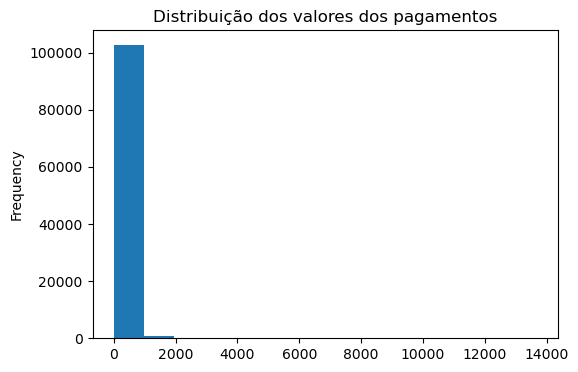

In [102]:
order_payments['payment_value'].plot(
    kind='hist',
    figsize=(6,4),
    xlabel='Valor',
    ylabel='Frequência',
    title='Distribuição dos valores dos pagamentos',
    bins=14)

A maioria predominante dos pagamentos não supera \\$1000.

Assim, a análise dos maiores pagamentos considerará aqueles maiores que \\$1000.

In [107]:
# Série com os valores dos maiores pagamentos, considerados aqueles maiores que $1000.
payments_gt_1000 = order_payments[order_payments['payment_value'] > 1000]

<Axes: title={'center': 'Distribuição dos valores dos maiores pagamentos'}, ylabel='Frequency'>

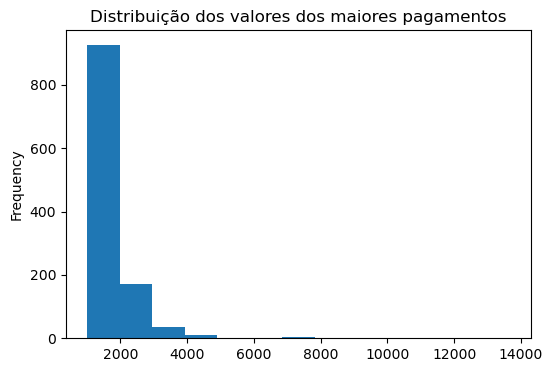

In [109]:
payments_gt_1000['payment_value'].plot(
    kind='hist',
    figsize=(6,4),
    xlabel='Valor',
    ylabel='Frequência',
    title='Distribuição dos valores dos maiores pagamentos',
    bins=13)

In [110]:
payments_gt_1000['payment_type'].value_counts(True)

credit_card    0.820870
boleto         0.154783
debit_card     0.013043
voucher        0.011304
Name: payment_type, dtype: float64

Aproximadamente 82\% dos pagamentos acima de \\$1000 foram feitos com cartão de crédito.

Percentual ligeiramente maior que os 74\% dos pagamentos feitos com cartão de crédito, obtido quando consideramos todas as compras.

In [112]:
payments_gt_1000[payments_gt_1000['payment_type'] == 'credit_card']['payment_installments'].value_counts(True).head(5)

10    0.479873
8     0.158898
1     0.077331
6     0.064619
5     0.057203
Name: payment_installments, dtype: float64

Dentre os maiores pagamentos realizados com cartão de crédito, aproximadamente 48\% foram parcelados em 10 vezes e 16\% em oito vezes, o que permite concluir que nós, brasileiros, adoramos parcelar no cartão, a perder de vista!!! 

### 2.2 Quais os tipos de pagamento que permitem parcelamento?

O parcelamento só é possível com cartão de crédito. Os demais tipos de pagamento têm somente 1 parcela.

In [13]:
order_payments[order_payments['payment_type'] != 'credit_card'].value_counts([order_payments['payment_type'], order_payments['payment_installments']])

payment_type  payment_installments
boleto        1                       19784
voucher       1                        5775
debit_card    1                        1529
not_defined   1                           3
dtype: int64

Nas compras com cartão de crédito, as compras à vista representam 33% do total, seguidas pelas compras parceladas em 2 vezes, correspondentes a 16%.

In [62]:
order_payments[order_payments['payment_type'] == 'credit_card'].value_counts(order_payments['payment_installments'], True).head(10)

payment_installments
1     0.331467
2     0.161638
3     0.136220
4     0.092428
10    0.069380
5     0.068221
8     0.055577
6     0.051045
7     0.021173
9     0.008386
dtype: float64

### 2.3. Quais categorias possuem quantidades de produtos acima da média?

Contagem de produtos por categoria:

In [68]:
products_per_category = products['product_category_name'].value_counts()
products_per_category

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [87]:
print('A média da quantidade de produtos por categoria é:', "{:.0f}".format(products_per_category.mean()))

A média da quantidade de produtos por categoria é: 443


<Axes: title={'center': 'Categorias de produtos com quantidade acima da média'}, xlabel='Quantidade', ylabel='Categoria'>

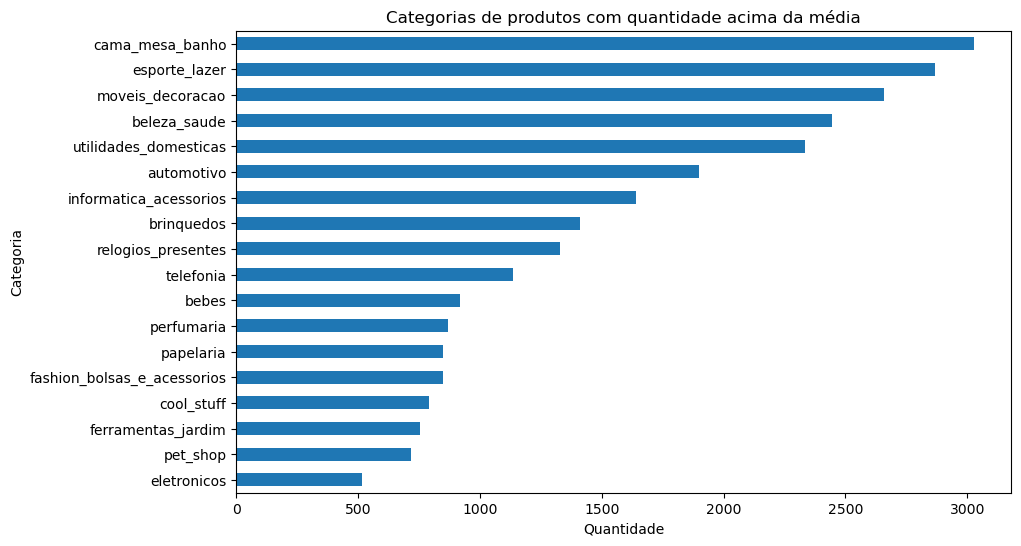

In [94]:
categories_gt_mean = products_per_category[products_per_category > products_per_category.mean()]
categories_gt_mean.sort_values(ascending=True, inplace=True)
categories_gt_mean.plot(
    kind='barh',
    figsize=(10,6),
    title='Categorias de produtos com quantidade acima da média',
    ylabel='Categoria',
    xlabel='Quantidade')

## 3. Insersão de coluna no dataframe utilizando ndarray

### 3.1. Qual o volume de cada produto em litros?

In [56]:
# O produto das dimensões em cm resulta no volume em cm3. Sendo 1 l = 1 dm3, basta dividir o resultado por 1000 para obter
# o volume em litros.
length = np.array(products['product_length_cm'])
width = np.array(products['product_width_cm'])
height = np.array(products['product_height_cm'])
volume = length * width * height / 1000

In [57]:
type(volume)

numpy.ndarray

In [58]:
products['volume_l'] = volume
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume_l
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2.240
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10.800
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2.430
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2.704
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4.420
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,64.000
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,4.864
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,5.103
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,8.060
